In [1]:
import warnings
from trainer import *
from models import *
from datamodule import Dataset
warnings.filterwarnings("ignore")
from plotting_utils import *
from car_env import *
from training_utils import *
from torch import nn
torch.manual_seed(200)
%reload_ext autoreload
%autoreload 2

In [2]:
car_env = CarEnv()
dataset = Dataset(load = False)
dataset.summarize(train = True)
print("\n")
dataset.summarize(train = False)

Environment: CarRacing-v2
Action space: Discrete(5)
Observation space: Box(0, 255, (96, 96, 3), uint8)
DATA SAVED!
N Examples: 6369
N Inputs: 3
N Classes: 5
Classes: [0. 1. 2. 3. 4.]
 - Class 0.0: 1000 (15.701051970482022)
 - Class 1.0: 1500 (23.551577955723033)
 - Class 2.0: 1500 (23.551577955723033)
 - Class 3.0: 2000 (31.402103940964043)
 - Class 4.0: 369 (5.7936881771078665)


N Examples: 2749
N Inputs: 3
N Classes: 5
Classes: [0. 1. 2. 3. 4.]
 - Class 0.0: 133 (4.838122953801383)
 - Class 1.0: 275 (10.00363768643143)
 - Class 2.0: 406 (14.76900691160422)
 - Class 3.0: 1896 (68.97053473990542)
 - Class 4.0: 39 (1.4186977082575483)


In [3]:
cnn = CNN(name="new", num_classes = 5)
trainer = Trainer(model=cnn, data=dataset)

EPOCH 1 SCORE: 0.435 LOSS: 1.423
EPOCH 2 SCORE: 0.576 LOSS: 1.373
EPOCH 3 SCORE: 0.605 LOSS: 1.309
EPOCH 4 SCORE: 0.583 LOSS: 1.293
EPOCH 5 SCORE: 0.570 LOSS: 1.290
EPOCH 6 SCORE: 0.562 LOSS: 1.316
EPOCH 7 SCORE: 0.603 LOSS: 1.244
EPOCH 8 SCORE: 0.603 LOSS: 1.234
EPOCH 9 SCORE: 0.523 LOSS: 1.305
EPOCH 10 SCORE: 0.584 LOSS: 1.248
Train Score:  0.550792932510376
Test Score:  0.6078574061393738
              precision    recall  f1-score   support

         0.0      0.176     0.526     0.264       133
         1.0      0.311     0.353     0.330       275
         2.0      0.485     0.522     0.503       406
         3.0      0.832     0.676     0.746      1896
         4.0      0.161     0.256     0.198        39

    accuracy                          0.608      2749
   macro avg      0.393     0.467     0.408      2749
weighted avg      0.687     0.608     0.637      2749



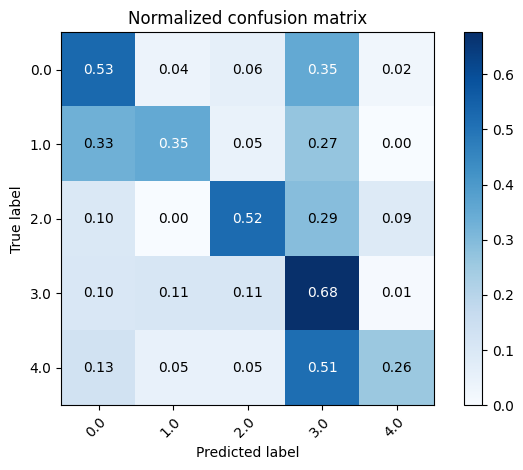

In [4]:
trainer.fit()
trainer.evaluate()

Train Score:  0.5512639284133911
Test Score:  0.6053110361099243
              precision    recall  f1-score   support

         0.0      0.172     0.541     0.261       133
         1.0      0.301     0.327     0.314       275
         2.0      0.486     0.542     0.512       406
         3.0      0.839     0.673     0.747      1896
         4.0      0.103     0.154     0.124        39

    accuracy                          0.605      2749
   macro avg      0.380     0.447     0.392      2749
weighted avg      0.690     0.605     0.637      2749



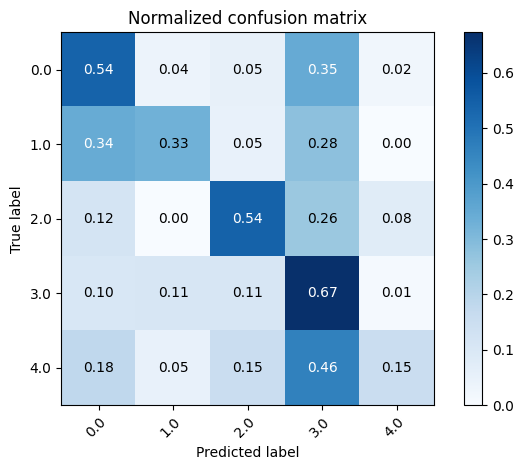

In [5]:
cnn.load(name="new")
trained = Trainer(cnn, dataset)
trained.evaluate()

In [6]:
car_env.play(cnn)

581.7676767676616
True
